In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from sklearn.utils import shuffle
%matplotlib inline

# Data plotting

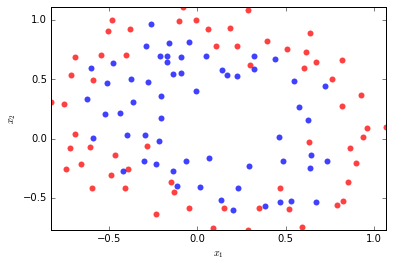

In [2]:
import csv
data_x = []; data_y = []
# This data set came from Dr. Andrew Ng's Machine Learning course in Cousera
with open('regularized_logistic_regression_data.txt', 'rx') as data_file:
    for row in csv.reader(data_file, delimiter=','):
        data_x.append([float(row[0]), float(row[1])])
        data_y.append(float(row[2]))
data_x = np.array(data_x)
data_y = np.array(data_y).reshape((data_x.shape[0], 1))
case_0_idx = np.where(data_y == 0)[0]
case_1_idx = np.where(data_y == 1)[0]
min_x = np.min(data_x[:,0]); max_x = np.max(data_x[:,0])
min_y = np.min(data_x[:,1]); max_y = np.max(data_x[:,1])
plt.axis((min_x, max_x, min_y, max_y))
plt.plot(data_x[case_0_idx,0], data_x[case_0_idx,1], 'ro', markeredgewidth=0.0, alpha=0.75)
plt.plot(data_x[case_1_idx,0], data_x[case_1_idx,1], 'bo', markeredgewidth=0.0, alpha=0.75)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

# Feature extraction

In [3]:
def extract_feat(data):
    degree = 6
    feat = None
    for i in range(1, degree+1):
        for j in range(i+1):
            new_col = pow(data[:,0], i-j) * pow(data[:,1], j)
            if feat is None:
                feat = np.array(new_col)
            else:
                feat = np.column_stack((feat, new_col))
    return feat

feat_x = extract_feat(data_x)

# Design

In [4]:
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
W = tf.Variable(tf.random_uniform([feat_x.shape[1], 1], -0.000001, 0.000001))
b = tf.Variable(tf.zeros([1]))
rc = tf.placeholder(tf.float32)
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
loss = tf.reduce_mean(-y * tf.log(hypothesis) - (1-y) * tf.log(1-hypothesis) + rc * tf.nn.l2_loss(W))

# Trainining and visualization

In [5]:
def logistic_regression(reg_coeff):
    optimizer = tf.train.GradientDescentOptimizer(tf.Variable(1.0))
    train_op = optimizer.minimize(loss)

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        # Fit the model
        sess.run(init)
        for i in xrange(100000):
            sess.run(train_op, feed_dict={X:feat_x, y:data_y, rc:reg_coeff})

        # Find the dicision boundary
        min_x = np.min(data_x[:,0]); max_x = np.max(data_x[:,0])
        min_y = np.min(data_x[:,1]); max_y = np.max(data_x[:,1])
        h = 0.01
        u, v = np.meshgrid(np.arange(min_x, max_x, h), np.arange(min_y, max_y, h))
        z = sess.run(hypothesis, feed_dict={X:extract_feat(np.column_stack((u.ravel(), v.ravel())))})
        z = z.reshape(u.shape)

        # Print the results
        plt.axis((min_x, max_x, min_y, max_y))
        plt.xlabel('$x_1$')
        plt.ylabel('$x_2$')
        plt.plot(data_x[case_0_idx,0], data_x[case_0_idx,1], 'ro', markeredgewidth=0.0, alpha=0.75)
        plt.plot(data_x[case_1_idx,0], data_x[case_1_idx,1], 'bo', markeredgewidth=0.0, alpha=0.75)
        plt.clabel(plt.contour(u, v, z, [0.25, 0.5, 0.75], cmap=plt.cm.jet_r), inline=1)
        plt.show()

# Lambda = 0.0

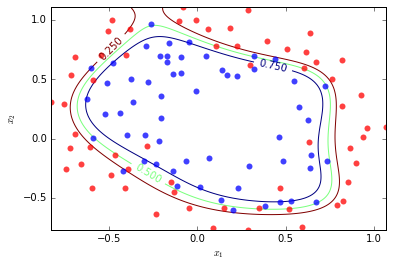

In [6]:
logistic_regression(reg_coeff = 0)

# Lambda = 0.01

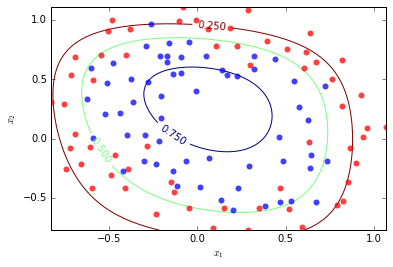

In [7]:
logistic_regression(reg_coeff = 0.01)

# Lambda = 0.1

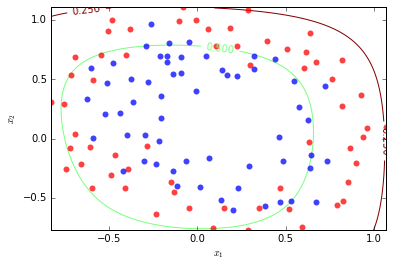

In [8]:
logistic_regression(reg_coeff = 0.1)